# Определение перспективного тарифа для телеком-компании

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
data_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


По условию задачи, звонки с продолжительностью 0 оставляем как пропущенные. Сразу приведём столбец с датой к формату datetime

In [5]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format = '%Y-%m-%d')
data_calls['duration'] = np.ceil(data_calls['duration']).astype(int)
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [6]:
data_internet = pd.read_csv('/datasets/internet.csv')
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
data_internet.head(20)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Приведём столбец с датой к datetime и удалим лишний столбец, дублирующий индексы "Unnamed: 0"

In [8]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format = '%Y-%m-%d')
data_internet = data_internet.drop(columns=['Unnamed: 0'])
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [9]:
data_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [10]:
data_internet[data_internet['mb_used']==0]

,id,mb_used,session_date,user_id
11,1000_11,0.0,2018-08-28,1000
38,1000_38,0.0,2018-11-27,1000
46,1000_46,0.0,2018-06-30,1000
67,1000_67,0.0,2018-06-16,1000
72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...
149380,1499_141,0.0,2018-12-11,1499
149381,1499_142,0.0,2018-11-01,1499
149383,1499_144,0.0,2018-11-27,1499
149386,1499_147,0.0,2018-10-21,1499


In [11]:
data_internet[data_internet['mb_used']==0]['user_id'].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132,
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 11

Видим 19.5к строк с нулевым трафиком за сессию (для каждого юзера есть подобные строки). Т.к. эти строки могут исказить последующий анализ данных - избавимся от них.

In [12]:
data_internet = data_internet.query('mb_used > 0')
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            129798 non-null  object        
 1   mb_used       129798 non-null  float64       
 2   session_date  129798 non-null  datetime64[ns]
 3   user_id       129798 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.0+ MB


In [13]:
data_messages = pd.read_csv('/datasets/messages.csv')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [15]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format = '%Y-%m-%d')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [16]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [17]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [18]:
data_users = pd.read_csv('/datasets/users.csv')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
data_users.head(20)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [20]:
data_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [21]:
data_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [22]:
data_users.duplicated().unique()

array([False])

In [23]:
sorted(data_users['last_name'].unique())

['Ёлчина',
 'Ёркин',
 'Ёркина',
 'Ёрохов',
 'Ёрохова',
 'Абаимов',
 'Абакумов',
 'Абакшина',
 'Абалакова',
 'Абалдуева',
 'Абалкин',
 'Абашкин',
 'Абашкина',
 'Абдулина',
 'Абоимов',
 'Абрамович',
 'Абрамцев',
 'Абрамычева',
 'Абрашина',
 'Абрикосова',
 'Авдеев',
 'Авдеенко',
 'Авдонюшкин',
 'Авдушева',
 'Авдышев',
 'Авдюков',
 'Авраамова',
 'Авраменко',
 'Авринский',
 'Аврорин',
 'Авроров',
 'Авросимова',
 'Авросинова',
 'Авсейкина',
 'Авчинникова',
 'Агаев',
 'Агаева',
 'Агапеева',
 'Агеева',
 'Адаменко',
 'Адамов',
 'Азаров',
 'Азерников',
 'Азимова',
 'Акимов',
 'Акимчин',
 'Акимычева',
 'Акиндинов',
 'Акинин',
 'Акинфьев',
 'Аксёнов',
 'Акуленко',
 'Александрова',
 'Александрович',
 'Александрюк',
 'Алексеева',
 'Алексеенко',
 'Алексеичев',
 'Аленникова',
 'Алесин',
 'Алехина',
 'Алешин',
 'Алешина',
 'Алешкова',
 'Алиев',
 'Алфеева',
 'Алфимов',
 'Алфимова',
 'Алымова',
 'Алютин',
 'Алюшина',
 'Алёшко',
 'Алёшкова',
 'Амелин',
 'Амелишко',
 'Амельченко',
 'Ананьева',
 'Андреенко'

In [24]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format = '%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format = '%Y-%m-%d')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Вывод

Файлы с данными изучены, изменён тип данных на datetime в столбцах с датами, удалены строки с нулевыми значениями использованного трафика за сессию. Округлены разговоры до минут в боюшую сторону по условиям оператора. Явных и неявных дубликатов не обнаружено. Идём дальше.

## Подготовка данных

Найдём для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам

In [25]:
data_calls['month'] = data_calls['call_date'].dt.month

In [26]:
data_calls_pivot_count = data_calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = 'count')
data_calls_pivot_sum = data_calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = 'sum')
data_calls_pivot_count = data_calls_pivot_count.rename(columns ={'duration':'calls_count'}).reset_index()
data_calls_pivot_sum = data_calls_pivot_sum.rename(columns ={'duration':'calls_sum'}).reset_index()
data_calls_pivot_count.head()

,user_id,month,calls_count
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58


In [27]:
data_calls_pivot_sum.head()

,user_id,month,calls_sum
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


In [28]:
data_merged = data_calls_pivot_count.merge(data_calls_pivot_sum, how='outer')
data_merged.head()

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


Найдём для каждого пользователя количество отправленных сообщений по месяцам

In [29]:
data_messages['month'] = data_messages['message_date'].dt.month

In [30]:
data_messages_pivot = data_messages.pivot_table(index = ['user_id','month'] ,values ='id', aggfunc = 'count')
data_messages_pivot = data_messages_pivot.rename(columns ={'id':'message_count'}).reset_index()
data_messages_pivot.head()

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Присоединим эти данные к нашей сводной таблице

In [31]:
data_merged = data_merged.merge(data_messages_pivot, how='outer')
data_merged.head()

,user_id,month,calls_count,calls_sum,message_count
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0


Найдём для каждого пользователя объем израсходованного интернет-трафика по месяцам и присоединим к сводной

In [32]:
data_internet['month'] = data_internet['session_date'].dt.month

In [33]:
data_internet_pivot = data_internet.pivot_table(index = ['user_id','month'] ,values ='mb_used', aggfunc = 'sum')
data_internet_pivot = data_internet_pivot.rename(columns ={'mb_used':'mb_used'}).reset_index()
data_merged = data_merged.merge(data_internet_pivot, how='outer')
data_merged.head()

,user_id,month,calls_count,calls_sum,message_count,mb_used
0,1000,5,22.0,159.0,22.0,2253.49
1,1000,6,43.0,172.0,60.0,23233.77
2,1000,7,47.0,340.0,75.0,14003.64
3,1000,8,52.0,408.0,81.0,14055.93
4,1000,9,58.0,466.0,57.0,14568.91


Дальше посчитаем помесячную выручку с каждого пользователя. Для этого дополним нашу сводную таблицу данным по юзерам

In [34]:
data_merged = data_merged.merge(data_users, how='outer')
data_merged.head()

,user_id,month,calls_count,calls_sum,message_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Дальше посчитаем переплаты за лимиты по каждому юзеру в зависимости от тарифа

In [35]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [36]:
def monthly_calls_payment(row):
    if row['tariff']=='ultra':
        if row['calls_sum'] - 3000  > 0:
            return (row['calls_sum'] - 3000)*1
    elif row['tariff']=='smart':
        if row['calls_sum'] - 500  > 0:
            return (row['calls_sum'] - 500)*3
    else:
        return 0

In [37]:
data_merged['monthly_calls_payment'] = data_merged.apply(monthly_calls_payment, axis=1)

In [38]:
def monthly_messages_payment(row):
    if row['tariff']=='ultra':
        if row['message_count'] - 1000  > 0:
            return (row['message_count'] - 1000)*1
    elif row['tariff']=='smart':
        if row['message_count'] - 50  > 0:
            return (row['calls_sum'] - 50)*3
    else:
        return 0

In [39]:
data_merged['monthly_messages_payment'] = data_merged.apply(monthly_messages_payment, axis=1)

In [40]:
def monthly_internet_payment(row):
    if row['tariff']=='ultra':
        if row['mb_used'] - 30720  > 0:
            return round((row['mb_used'] - 30720)/1024)*150
    elif row['tariff']=='smart':
        if row['mb_used'] - 15360  > 0:
            return round((row['mb_used'] - 15360)/1024)*200
    else:
        return 0

In [41]:
data_merged['monthly_internet_payment'] = data_merged.apply(monthly_internet_payment, axis=1)

In [42]:
def monthly_fee(row):
    if row['tariff']=='ultra':
        return 1950
    elif row['tariff']=='smart':
        return 550

In [43]:
data_merged['monthly_tariff_fee'] = data_merged.apply(monthly_fee, axis=1)

In [44]:
#заполним пустые ячейки нулями, чтобы высчитать итоговую стоимость 
data_merged = data_merged.fillna(0)

In [45]:
data_merged['monthly_total_fee'] = (data_merged['monthly_tariff_fee'] + 
                                    data_merged['monthly_internet_payment'] + 
                                    data_merged['monthly_messages_payment'] + 
                                    data_merged['monthly_calls_payment'])

In [46]:
data_merged.describe()

,user_id,month,calls_count,calls_sum,message_count,mb_used,age,monthly_calls_payment,monthly_messages_payment,monthly_internet_payment,monthly_tariff_fee,monthly_total_fee
count,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000
mean,1251.588930,8.312189,62.999689,450.964241,38.257463,17196.911608,46.643968,86.510261,225.416045,405.674751,979.228856,1696.829913
std,144.645928,2.911903,33.263185,242.096312,36.149684,7580.754906,16.581233,219.173942,533.906459,647.138440,645.610249,935.574950
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,-129.000000,0.000000,550.000000,550.000000
25%,1125.000000,6.000000,40.000000,282.000000,9.000000,12478.765000,32.000000,0.000000,0.000000,0.000000,550.000000,882.750000
50%,1253.000000,9.000000,62.000000,443.000000,30.000000,16937.820000,46.000000,0.000000,0.000000,0.000000,550.000000,1950.000000
75%,1378.250000,11.000000,82.000000,589.000000,57.000000,21422.375000,62.000000,0.000000,0.000000,600.000000,1950.000000,1950.000000
max,1499.000000,12.000000,244.000000,1673.000000,224.000000,49745.690000,75.000000,2805.000000,4155.000000,4600.000000,1950.000000,9542.000000


Посчитали столбец monthly_total_fee, где для каждого пользователя указали помесячную выручку, в зависимости от тарифа и расхода лимитов. Удалим лишние столбцы и можно приступать к анализу выборки.

In [47]:
data_final = data_merged.copy()
data_final = data_final.drop(columns=['monthly_calls_payment','monthly_messages_payment','monthly_internet_payment','monthly_tariff_fee'])
data_final.head()

,user_id,month,calls_count,calls_sum,message_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,monthly_total_fee
0,1000,5.0,22.0,159.0,22.0,2253.49,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
1,1000,6.0,43.0,172.0,60.0,23233.77,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
2,1000,7.0,47.0,340.0,75.0,14003.64,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
3,1000,8.0,52.0,408.0,81.0,14055.93,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
4,1000,9.0,58.0,466.0,57.0,14568.91,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0


### Вывод

Подготовили общую сводную таблицу, где для каждого пользователя отобразили: количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам, помесячную выручку с каждого пользователя.


## Анализ данных

Рассмотрим на нашей выборке сколько минут разговора, сколько сообщений и какой объём интернет-трафика расходуют пользователи каждого тарифа в месяц

Среднее равно: 526.0892494929006
Дисперсия равна: 100950.00623331097
Стандартное отклонение равно: 317.72630711559117


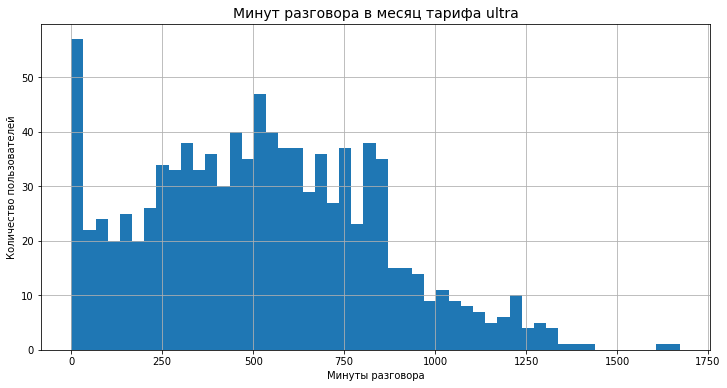

In [48]:
data_final[data_final['tariff'] == 'ultra']['calls_sum'].hist(bins=50,figsize=(12, 6) )
plt.title('Минут разговора в месяц тарифа ultra', fontsize=14)
plt.xlabel('Минуты разговора')
plt.ylabel('Количество пользователей')
None
print('Среднее равно:', np.mean(data_final[data_final['tariff'] == 'ultra']['calls_sum']))
print('Дисперсия равна:', np.var(data_final[data_final['tariff'] == 'ultra']['calls_sum']))
print('Стандартное отклонение равно:', np.std(data_final[data_final['tariff'] == 'ultra']['calls_sum']))

Распределение по минутам разговора скошенное влево. Видим резкий спад по израсходованным минутам после 800ой (при лимите 3000)

Среднее равно: 417.747533632287
Дисперсия равна: 36265.12415310985
Стандартное отклонение равно: 190.4340414765959


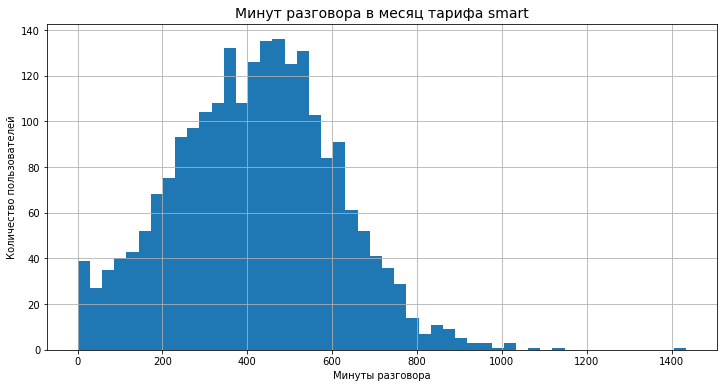

In [49]:
data_final[data_final['tariff'] == 'smart']['calls_sum'].hist(bins=50,figsize=(12, 6) )
plt.title('Минут разговора в месяц тарифа smart', fontsize=14)
plt.xlabel('Минуты разговора')
plt.ylabel('Количество пользователей')
None
print('Среднее равно:', np.mean(data_final[data_final['tariff'] == 'smart']['calls_sum']))
print('Дисперсия равна:', np.var(data_final[data_final['tariff'] == 'smart']['calls_sum']))
print('Стандартное отклонение равно:', np.std(data_final[data_final['tariff'] == 'smart']['calls_sum']))

Распределение по минутам разговора близкое к нормальному, немного скошенно влево. При лимите в 500 минут, чуть больше половины пользователей укладываются в лимит, остальные - нет.

Среднее равно: 49.31338742393509
Дисперсия равна: 2283.0995570851965
Стандартное отклонение равно: 47.781791061922284


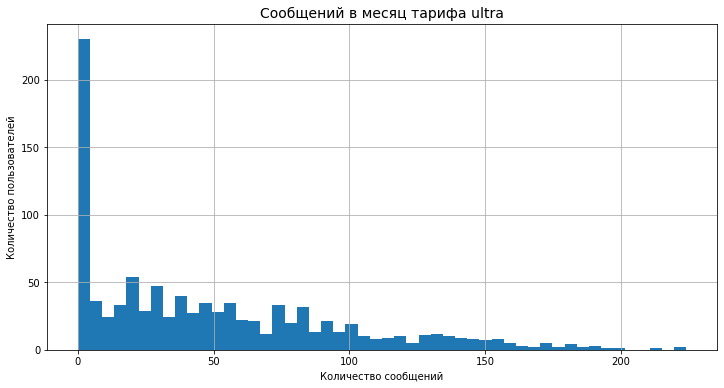

In [50]:
data_final[data_final['tariff'] == 'ultra']['message_count'].hist(bins=50,figsize=(12, 6) )
plt.title('Сообщений в месяц тарифа ultra', fontsize=14)
plt.xlabel('Количество сообщений')
plt.ylabel('Количество пользователей')
None
print('Среднее равно:', np.mean(data_final[data_final['tariff'] == 'ultra']['message_count']))
print('Дисперсия равна:', np.var(data_final[data_final['tariff'] == 'ultra']['message_count']))
print('Стандартное отклонение равно:', np.std(data_final[data_final['tariff'] == 'ultra']['message_count']))

Среднее равно: 33.36905829596412
Дисперсия равна: 796.5978766916688
Стандартное отклонение равно: 28.224065559229217


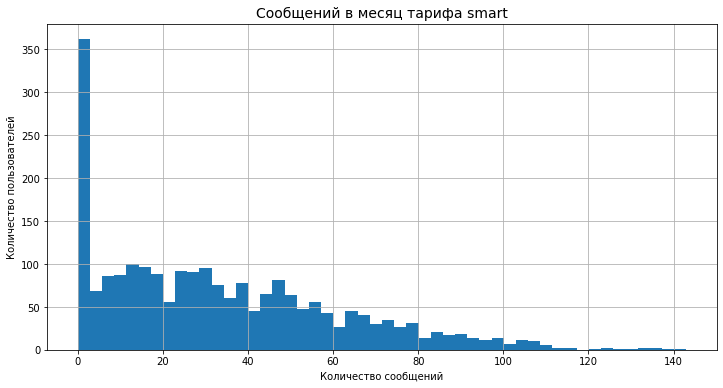

In [51]:
data_final[data_final['tariff'] == 'smart']['message_count'].hist(bins=50,figsize=(12, 6) )
plt.title('Сообщений в месяц тарифа smart', fontsize=14)
plt.xlabel('Количество сообщений')
plt.ylabel('Количество пользователей')
None
print('Среднее равно:', np.mean(data_final[data_final['tariff'] == 'smart']['message_count']))
print('Дисперсия равна:', np.var(data_final[data_final['tariff'] == 'smart']['message_count']))
print('Стандартное отклонение равно:', np.std(data_final[data_final['tariff'] == 'smart']['message_count']))

На обоих тарифах наблюдаем сильно скошенное влево в сторону 0 распределение. Сообщения мало кому нужны, но на тарифе smart ими пользутся активнее.

Среднее равно: 19449.059969574035
Дисперсия равна: 101928648.60329504
Стандартное отклонение равно: 10095.971899886363


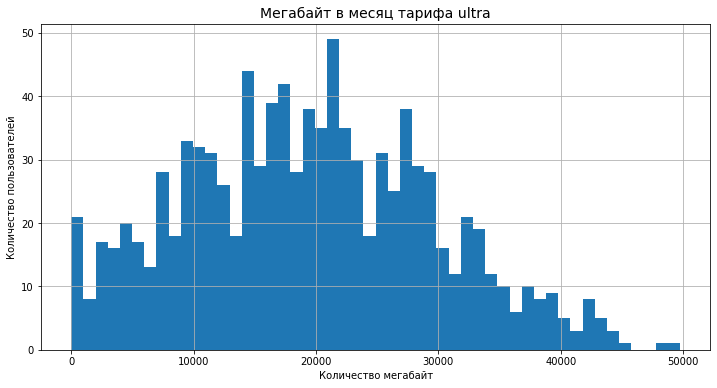

In [52]:
data_final[data_final['tariff'] == 'ultra']['mb_used'].hist(bins=50,figsize=(12, 6) )
plt.title('Мегабайт в месяц тарифа ultra', fontsize=14)
plt.xlabel('Количество мегабайт')
plt.ylabel('Количество пользователей')
None
print('Среднее равно:', np.mean(data_final[data_final['tariff'] == 'ultra']['mb_used']))
print('Дисперсия равна:', np.var(data_final[data_final['tariff'] == 'ultra']['mb_used']))
print('Стандартное отклонение равно:', np.std(data_final[data_final['tariff'] == 'ultra']['mb_used']))

Среднее равно: 16201.118654708522
Дисперсия равна: 34549343.55148492
Стандартное отклонение равно: 5877.868963449672


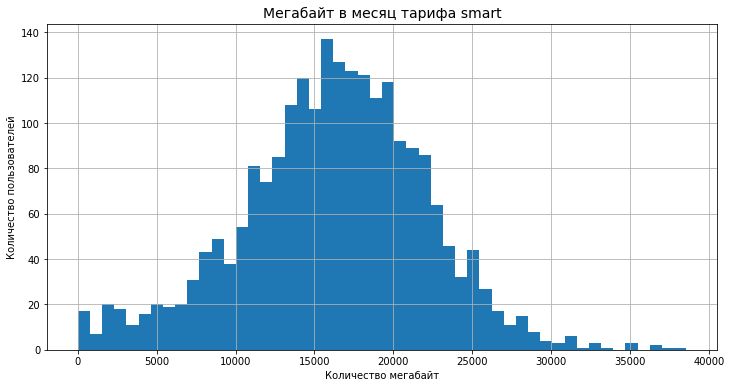

In [53]:
data_final[data_final['tariff'] == 'smart']['mb_used'].hist(bins=50,figsize=(12, 6) )
plt.title('Мегабайт в месяц тарифа smart', fontsize=14)
plt.xlabel('Количество мегабайт')
plt.ylabel('Количество пользователей')
None
print('Среднее равно:', np.mean(data_final[data_final['tariff'] == 'smart']['mb_used']))
print('Дисперсия равна:', np.var(data_final[data_final['tariff'] == 'smart']['mb_used']))
print('Стандартное отклонение равно:', np.std(data_final[data_final['tariff'] == 'smart']['mb_used']))

По использованному трафику распределения близкие к нормальному. На тарифе ультра большинство пользователей укладывается в лимит, а на смарте - нет.

### Вывод

Рассмотрели количество используемого пользователями трафика интернета, сообщений и минут разговора для каждого тарифа в месяц.

## Проверка гипотез

Проверим гипотезу: "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"

Формулируем нулевую гипотезу так: средняя выручка пользователей тарифов ультра и смарт равна. Альтернативная гипотеза: средняя выручка пользователей тарифа смарт значимо меньше средней выручки тарифа ультра. Для проверки используем t-test c критерием проверки о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, т.к. имеем две независимые выборки и хотим сравнить равно ли выборочное среднее одной выборке выборочному среднему дргой.

In [54]:
sample_1 = data_final[data_final['tariff']=='ultra']['monthly_total_fee']
sample_2 = data_final[data_final['tariff']=='smart']['monthly_total_fee']
results = st.ttest_ind(sample_1, sample_2)
alpha = 0.05
print('p-value равно:', results.pvalue)
if results.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-value равно: 5.888336072790344e-50
Отвергаем нулевую гипотезу


Проверим альтернативную гипотезу: средняя выручка пользователей тарифа смарт значимо меньше средней выручки тарифа ультра. Для этого использем t-test для проверки односторонней гипотезы, т.к. нам нужно определить меньше ли выборочное среднее одной выборке выборочного среднего другой.

In [55]:
result_2 = st.ttest_1samp(
    sample_2, 
    sample_1.mean())
print('p-значение:', result_2.pvalue / 2)
if (result_2.pvalue / 2 < alpha) and (sample_2.mean() < sample_1.mean()):
    print("Отвергаем альтернативную гипотезу")
else:
    print("Не получилось отвергнуть альтернативную гипотезу")

p-значение: 6.237305172941369e-108
Отвергаем альтернативную гипотезу


На основе расчётов выше можем принять гипотезу как рабочую: средняя выручка пользователей тарифа смарт больше средней выручки тарифа ультра

Проверим гипотезу: "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

Формулируем нулевую гипотезу так: средняя выручка пользователей из Москвы и других регионов равна. Альтернативная гипотеза: средняя выручка пользователей из Москвы больше средней выручки пользователей других регионов. Для проверки используем t-test c критерием проверки о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, т.к. имеем две независимые выборки и хотим сравнить равно ли выборочное среднее одной выборке выборочному среднему дргой.

In [56]:
sample_3 = data_final[data_final['city']=='Москва']['monthly_total_fee']
sample_4 = data_final[data_final['city']!='Москва']['monthly_total_fee']
results_3 = st.ttest_ind(sample_3, sample_4)
alpha = 0.05
print('p-value равно:', results_3.pvalue)
if results_3.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-value равно: 0.09569246234322934
Не получилось отвергнуть нулевую гипотезу


Принимаем нулевую гипотезу как рабочую: средняя выручка пользователей из Москвы и других регионов равна

### Вывод

Проверили 2 гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются; средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Для первой гипотезы установили, что средняя выручка тарифа смарт больше, чем тарифа ультра. Для второй гипотезы получили опровержение.

## Общий вывод

В данном проекте мы попытались определить какой мобильный тариф выгоднее на основе предоставленной выборки из 500 пользователей. По ходу проекта мы изучили, подготовили данные (привели к нужным типам и избавились от части пустых значений), собрали сводный датафрейм с интересующими нам данными и проанализировали его. Определили, что большинство пользователей тарифа ultra укладываются в 800минут разговора в месяц (при лимите 3000), а пользователи smart примерно поровну укладываются и не укладываются в месячный лимит в 500 минут (тех кто не укладывается чуть меньше). Сообщениями мало кто пользуется и там и там, а по интернет трафику перерасходы лимита на обоих тарифах (на smart большинство не улкдаывается, на ultra большинство укладывается). После проверки гипотез установили, что тариф smart коммерчески выгоднее тарифа ultra по средней выручке, а средняя выручка пользователей из Москвы и пользователей из других регионов примерно равны.